In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import yellowbrick as yb
from yellowbrick.features import RadViz
from yellowbrick.features import ParallelCoordinates
from yellowbrick.features import Rank2D
from yellowbrick.features.pca import PCADecomposition
from yellowbrick.features.manifold import Manifold


from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [32]:
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge lightgbm

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - https://repo.continuum.io/pkgs/main/osx-64/osx-64::wrapt==1.11.2=py36h1de35cc_0
  - https://repo.continuum.io/pkgs/main/osx-64/osx-64::jupyter_console==6.0.0=py36_0
  - https://repo.continuum.io/pkgs/main/osx-64/osx-64::entrypoints==0.3=py36_0
  - https://repo.continuum.io/pkgs/main/osx-64/osx-64::webencodings==0.5.1=py36_1
  - https://repo.continuum.io/pkgs/main/noarch/noarch::qtawesome==0.6.0=py_0
  - https://repo.continuum.io/pkgs/main/osx-64/osx-64::isort==4.3.21=py36_0
  - https://repo.continuum.io/pkgs/main/osx-64/xlwt-1.2.0-py36h5ad1178_0.tar.bz2/osx-64::xlwt==1.2.0=py36h5ad1178_0
  - https://repo.continuum.io/pkgs/main/osx-64/osx-64::python.app==2=py36_9
  - https://repo.continuum.io/pkgs/main/noarch/noarch::prompt_toolkit==2.0.10=py_0
  - https://repo.continuum.io/pkgs/main/noarch/noarch::pygments==2.4.2=py_0
  - https://re

failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
  - https://repo.continuum.io/pkgs/main/osx-64::python-3.6.9-h359304d_0
  - defaults::python-3.6.9-h359304ddone


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base conda


Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - https://repo.continuum.io/pkgs/main/osx-64/osx-64::wrapt==1.11.2=py36h1de35cc_0
  - https://repo.continuum.io/pkgs/main/osx-64/osx-64::jupyter_console==6.0.0=py36_0
  - https://repo.continuum.io/pkgs/main/osx-64/osx-64::entrypoints==0.3=py36_0
  - https://repo.continuum.io/pkgs/main/osx-64/osx-64::webencodings==0.5.1=py36_1
  - https://repo.continuum.io/pkgs/main/noarch/noarch::qtawesome==0.6.0=py_0
  - https://repo.continuum.io/pkgs/main/osx-64/osx-64::isort==4.3.21=py

\ 
  - https://repo.continuum.io/pkgs/main/osx-64/jbig-2.1-h4d881f8_0.tar.bz2::jbig-2.1-h4d881f8_0, https://repo.continuum.io/pkgs/main/osx-64::conda-env-2.6.0-1, https://repo.continuum.io/pkgs/main/osx-64::pandoc-2.2.3.2-0, https://repo.continuum.io/pkgs/main/osx-64::ripgrep-0.10.0-hc07d326_0
  - defaults::conda-env-2.6.0-1, https://repo.continuum.io/pkgs/main/osx-64/jbig-2.1-h4d881f8_0.tar.bz2::jbig-2.1-h4d881f8_0, https://repo.continuum.io/pkgs/main/osx-64::pandoc-2.2.3.2-0, https://repo.continuum.io/pkgs/main/osx-64::ripgrep-0.10.0-hc07d326_0
  - defaults::jbig-2.1-h4d881f8_0, https://repo.continuum.io/pkgs/main/osx-64::conda-env-2.6.0-1, https://repo.continuum.io/pkgs/main/osx-64::pandoc-2.2.3.2-0, https://repo.continuum.io/pkgs/main/osx-64::ripgrep-0.10.0-hc07d326_0
  - defaults::conda-env-2.6.0-1, defaults::jbig-2.1-h4d881f8_0, https://repo.continuum.io/pkgs/main/osx-64::pandoc-2.2.3.2-0, https://repo.continuum.io/pkgs/main/osx-64::ripgrep-0.10.0-hc07d326_0
  - defaults::jbig-2.

In [2]:
df = pd.read_pickle('orig_final.pkl')

In [3]:
pd.set_option('display.max_columns',35)
df.head(15)

,credit_score,first_payment_date,maturity_date,msa_code,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,channel,ppm_flag,product_type,property_st,property_type,postal_code,ln_seq_number,ln_purpose,orig_ln_term,borrower_cnt,seller_name,servicer_name,yr1_def,yr3_def,yr5_def,curr_ln_delq_stas_1yr,curr_ln_delq_stas_3yr,curr_ln_delq_stas_5yr,bin_orig_upb
6957166,769.0,2012,204207.0,18020.0,0.0,1.0,P,80.0,23.0,272000.0,80.0,4.0,R,N,FRM,IN,SF,47200.0,F112Q2030812,P,360,2.0,Other sellers,Other servicers,0,0,0,0,0,0,3
1103425,771.0,2017,204710.0,26420.0,30.0,1.0,P,95.0,49.0,182000.0,95.0,4.0,R,N,FRM,TX,SF,77500.0,F117Q3261862,P,360,1.0,QUICKENLOANINC,QUICKENLOANINC,0,0,0,0,0,0,2
8934311,798.0,2012,203201.0,22020.0,0.0,1.0,P,67.0,22.0,107000.0,67.0,4.0,C,N,FRM,MN,SF,56500.0,F111Q4287527,C,240,1.0,USBANKNA,USBANKNA,0,0,0,0,0,0,1
5186011,764.0,2014,204411.0,46140.0,30.0,1.0,P,95.0,18.0,242000.0,95.0,4.0,C,N,FRM,OK,SF,74100.0,F114Q4089446,P,360,2.0,"SUNTRUSTMORTGAGE,INC","SUNTRUSTMORTGAGE,INC",0,0,0,0,0,0,3
3866010,682.0,2015,203009.0,41060.0,0.0,1.0,P,73.0,37.0,400000.0,73.0,3.0,R,N,FRM,MN,SF,56300.0,F115Q3110757,C,180,2.0,Other sellers,Other servicers,0,0,0,0,0,0,4
4183462,741.0,2015,204511.0,0.0,30.0,1.0,P,95.0,26.0,276000.0,95.0,4.0,C,N,FRM,TN,SF,37300.0,F115Q4100353,P,360,2.0,USBANKNA,USBANKNA,0,0,0,0,0,0,3
97691,696.0,2017,203706.0,40900.0,0.0,1.0,P,62.0,42.0,346000.0,62.0,4.0,B,N,FRM,CA,SF,95600.0,F117Q2105824,N,240,1.0,USBANKNA,USBANKNA,0,0,0,0,0,0,4
6652145,752.0,2014,202901.0,29404.0,6.0,1.0,P,82.0,23.0,128000.0,82.0,4.0,R,N,FRM,WI,SF,53100.0,F113Q4212449,N,180,1.0,Other sellers,Other servicers,0,0,0,0,0,0,1
7965694,737.0,2013,203301.0,31340.0,0.0,1.0,P,73.0,36.0,263000.0,58.0,4.0,R,N,FRM,VA,SF,24500.0,F112Q4380289,C,240,2.0,USBANKNA,USBANKNA,0,0,0,0,0,0,3
1894230,711.0,2016,203605.0,35084.0,12.0,1.0,P,90.0,34.0,417000.0,90.0,4.0,C,N,FRM,NJ,SF,7000.0,F116Q2105927,N,240,1.0,Other sellers,Other servicers,0,0,0,0,0,0,4


In [4]:
pd.options.display.float_format = '{:.2f}'.format
df.describe(include='all')

,credit_score,first_payment_date,maturity_date,msa_code,mi_percent,unit_cnt,occupancy_status,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,channel,ppm_flag,product_type,property_st,property_type,postal_code,ln_seq_number,ln_purpose,orig_ln_term,borrower_cnt,seller_name,servicer_name,yr1_def,yr3_def,yr5_def,curr_ln_delq_stas_1yr,curr_ln_delq_stas_3yr,curr_ln_delq_stas_5yr,bin_orig_upb
count,1474944.00,1474944.00,1474944.00,1474944.00,1474944.00,1474944.00,1474944,1474944.00,1474944.00,1474944.00,1474944.00,1474944.00,1474944,1474006,1474944,1474944,1474944,1474943.00,1474944,1474944,1474944.00,1474944.00,1474944,1474120,1474944.00,1474944.00,1474944.00,1474944.00,1474944.00,1474944.00,1474944.00
unique,nan,8.00,nan,nan,nan,nan,3,nan,nan,nan,nan,nan,4,1,1,54,5,nan,1465398,3,nan,nan,49,46,nan,nan,nan,nan,nan,nan,nan
top,nan,2017.00,nan,nan,nan,nan,P,nan,nan,nan,nan,nan,R,N,FRM,CA,SF,nan,F117Q2164765,P,nan,nan,Other sellers,Other servicers,nan,nan,nan,nan,nan,nan,nan
freq,nan,287695.00,nan,nan,nan,nan,1307250,nan,nan,nan,nan,nan,829331,1474006,1474944,224180,978881,nan,2,663109,nan,nan,523024,424206,nan,nan,nan,nan,nan,nan,nan
mean,754.22,nan,204068.43,27036.81,5.52,1.03,NaN,72.78,33.22,228399.09,72.27,3.97,NaN,NaN,NaN,NaN,NaN,55256.12,NaN,NaN,311.86,1.54,NaN,NaN,0.02,0.04,0.05,0.02,0.03,0.01,2.50
std,43.53,nan,707.25,14224.87,10.95,0.23,NaN,17.00,9.66,120254.76,16.92,0.59,NaN,NaN,NaN,NaN,NaN,30096.96,NaN,NaN,78.90,0.50,NaN,NaN,0.14,0.19,0.21,0.14,0.16,0.11,1.12
min,574.00,nan,201612.00,0.00,0.00,1.00,NaN,6.00,1.00,10000.00,6.00,2.00,NaN,NaN,NaN,NaN,NaN,600.00,NaN,NaN,60.00,1.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,725.00,nan,203412.00,16860.00,0.00,1.00,NaN,64.00,26.00,135000.00,63.00,4.00,NaN,NaN,NaN,NaN,NaN,30000.00,NaN,NaN,240.00,1.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,764.00,nan,204402.00,29820.00,0.00,1.00,NaN,77.00,34.00,205000.00,76.00,4.00,NaN,NaN,NaN,NaN,NaN,55100.00,NaN,NaN,360.00,2.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,2.00
75%,790.00,nan,204606.00,39300.00,0.00,1.00,NaN,80.00,41.00,303000.00,80.00,4.00,NaN,NaN,NaN,NaN,NaN,84300.00,NaN,NaN,360.00,2.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,3.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474944 entries, 6957166 to 4407498
Data columns (total 31 columns):
credit_score             1474944 non-null float32
first_payment_date       1474944 non-null category
maturity_date            1474944 non-null float64
msa_code                 1474944 non-null float32
mi_percent               1474944 non-null float32
unit_cnt                 1474944 non-null float32
occupancy_status         1474944 non-null object
orig_cltv                1474944 non-null float32
orig_debt_to_inc         1474944 non-null float32
orig_upb                 1474944 non-null float32
orig_ltv                 1474944 non-null float32
orig_int_rate            1474944 non-null float32
channel                  1474944 non-null object
ppm_flag                 1474006 non-null object
product_type             1474944 non-null object
property_st              1474944 non-null object
property_type            1474944 non-null object
postal_code              1474943 non

In [6]:
numcols = ['credit_score', 'mi_percent' , 'unit_cnt', 'orig_cltv',
           'orig_debt_to_inc', 'orig_upb', 'orig_ltv', 'orig_int_rate',
           'orig_ln_term', 'borrower_cnt','bin_orig_upb', 'yr3_def'
          ]
catcols = ['first_payment_date', 'occupancy_status',
           'channel', 'product_type', 'property_st', 'property_type',
           'ln_purpose', 'seller_name', 'servicer_name'
          ]


In [7]:
player_df = df[numcols+catcols]

In [8]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474944 entries, 6957166 to 4407498
Data columns (total 21 columns):
credit_score          1474944 non-null float32
mi_percent            1474944 non-null float32
unit_cnt              1474944 non-null float32
orig_cltv             1474944 non-null float32
orig_debt_to_inc      1474944 non-null float32
orig_upb              1474944 non-null float32
orig_ltv              1474944 non-null float32
orig_int_rate         1474944 non-null float32
orig_ln_term          1474944 non-null int16
borrower_cnt          1474944 non-null float64
bin_orig_upb          1474944 non-null int16
yr3_def               1474944 non-null int16
first_payment_date    1474944 non-null category
occupancy_status      1474944 non-null object
channel               1474944 non-null object
product_type          1474944 non-null object
property_st           1474944 non-null object
property_type         1474944 non-null object
ln_purpose            1474944 non-null object

In [9]:
traindf = pd.concat([player_df[numcols], pd.get_dummies(player_df[catcols])],axis=1)
features = traindf.columns

traindf = traindf.dropna()

In [10]:
traindf = pd.DataFrame(traindf,columns=features)

In [11]:
y = traindf['yr3_def']
X = traindf.copy()
del X['yr3_def']

In [12]:
X.head()

,credit_score,mi_percent,unit_cnt,orig_cltv,orig_debt_to_inc,orig_upb,orig_ltv,orig_int_rate,orig_ln_term,borrower_cnt,bin_orig_upb,first_payment_date_2008,first_payment_date_2009,first_payment_date_2010,first_payment_date_2011,first_payment_date_2012,first_payment_date_2013,...,servicer_name_PINGORALOANSERVICING,"servicer_name_PNCBANK,NATL",servicer_name_PODIUMMTGECAPITALLLC,servicer_name_PROVIDENTFUNDINGASSO,servicer_name_QUICKENLOANINC,servicer_name_REGIONSBANKDBAREGION,servicer_name_ROUNDPOINTMTGESERVIC,servicer_name_RUSHMORELOANMANAGEME,"servicer_name_SENECAMTGESERVICING,",servicer_name_SPECIALIZEDLOANSERVI,"servicer_name_STEARNSLENDING,LLC","servicer_name_SUNTRUSTMORTGAGE,INC",servicer_name_UNIONSAVINGSBANK,servicer_name_UNITEDSHOREFINANCIAL,servicer_name_USAAFEDSAVINGSBANK,servicer_name_USBANKNA,"servicer_name_WELLSFARGOBANK,NA"
6957166,769.00,0.00,1.00,80.00,23.00,272000.00,80.00,4.00,360,2.00,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1103425,771.00,30.00,1.00,95.00,49.00,182000.00,95.00,4.00,360,1.00,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8934311,798.00,0.00,1.00,67.00,22.00,107000.00,67.00,4.00,240,1.00,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5186011,764.00,30.00,1.00,95.00,18.00,242000.00,95.00,4.00,360,2.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3866010,682.00,0.00,1.00,73.00,37.00,400000.00,73.00,3.00,180,2.00,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
feature_name = list(X.columns)
# no of maximum features we need to select
num_feats=25


len(X.columns)

188

In [19]:
# Pearson Correlation
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


25 selected features


In [20]:
cor_feature

['seller_name_LOANDEPOTCOM,LLC',
 'servicer_name_PROVIDENTFUNDINGASSO',
 'mi_percent',
 'seller_name_PROVIDENTFUNDINGASSO',
 'servicer_name_PINGORALOANSERVICING',
 'seller_name_STEARNSLENDING,LLC',
 'first_payment_date_2018',
 'first_payment_date_2014',
 'first_payment_date_2012',
 'property_st_TX',
 'orig_ltv',
 'orig_cltv',
 'channel_C',
 'first_payment_date_2017',
 'servicer_name_NEWRESIDENTIALMTGELL',
 'ln_purpose_N',
 'servicer_name_LAKEVIEWLOANSERVICIN',
 'first_payment_date_2015',
 'channel_R',
 'orig_ln_term',
 'property_st_FL',
 'orig_debt_to_inc',
 'borrower_cnt',
 'orig_int_rate',
 'credit_score']

In [21]:

# chi Squared 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

25 selected features


In [22]:
chi_feature

['credit_score',
 'borrower_cnt',
 'first_payment_date_2012',
 'first_payment_date_2014',
 'first_payment_date_2015',
 'first_payment_date_2016',
 'first_payment_date_2017',
 'first_payment_date_2018',
 'channel_B',
 'channel_C',
 'channel_R',
 'property_st_FL',
 'property_st_TX',
 'ln_purpose_N',
 'seller_name_FRANKLINAMERICANMTGE',
 'seller_name_LOANDEPOTCOM,LLC',
 'seller_name_PROVIDENTFUNDINGASSO',
 'seller_name_STEARNSLENDING,LLC',
 'seller_name_USBANKNA',
 'servicer_name_FREEDOMMTGECORP',
 'servicer_name_LAKEVIEWLOANSERVICIN',
 'servicer_name_NEWRESIDENTIALMTGELL',
 'servicer_name_PINGORALOANSERVICING',
 'servicer_name_PROVIDENTFUNDINGASSO',
 'servicer_name_USBANKNA']

In [23]:
# RFE Recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 188 features.


/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 178 features.


/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 168 features.


/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 158 features.


/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 148 features.


/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 138 features.


/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 128 features.


/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 118 features.


/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 108 features.


/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 98 features.


/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 88 features.


/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 78 features.


/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 68 features.


/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 58 features.


/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 48 features.


/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 38 features.


/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 28 features.


/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

25 selected features


In [24]:
rfe_feature

['credit_score',
 'orig_cltv',
 'orig_debt_to_inc',
 'orig_ltv',
 'orig_int_rate',
 'first_payment_date_2017',
 'first_payment_date_2018',
 'property_st_PR',
 'property_st_VI',
 'seller_name_BANKOFAMERICA,NA',
 'seller_name_CALIBERFUNDINGLLC',
 'seller_name_COLORADOFEDSAVINGSBA',
 'seller_name_JPMORGANCHASEBANK,NA',
 'seller_name_METLIFEHOMELOANS,ADI',
 'seller_name_PROVIDENTFUNDINGASSO',
 'seller_name_QUICKENLOANINC',
 'seller_name_WELLSFARGOBANK,NA',
 'servicer_name_BANKOFAMERICA,NA',
 'servicer_name_CENTRALMTGECO',
 'servicer_name_CMCFUNDING,INC',
 'servicer_name_FREEDOMMTGECORP',
 'servicer_name_HOMEPOINTFINANCIALCO',
 'servicer_name_JPMORGANCHASEBANK,NA',
 'servicer_name_METLIFEHOMELOANS,ADI',
 'servicer_name_SPECIALIZEDLOANSERVI']

In [29]:
# LASSO
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

/Users/nathanielrice/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


25 selected features


In [30]:
embeded_lr_feature

['credit_score',
 'orig_cltv',
 'orig_debt_to_inc',
 'orig_ltv',
 'orig_int_rate',
 'first_payment_date_2018',
 'property_st_PR',
 'seller_name_BANKOFAMERICA,NA',
 'seller_name_CALIBERFUNDINGLLC',
 'seller_name_COLORADOFEDSAVINGSBA',
 'seller_name_FIFTHTHIRDMTGECO',
 'seller_name_JPMORGANCHASEBANK,NA',
 'seller_name_METLIFEHOMELOANS,ADI',
 'seller_name_PROVIDENTFUNDINGASSO',
 'seller_name_WELLSFARGOBANK,NA',
 'servicer_name_BANKOFAMERICA,NA',
 'servicer_name_CMCFUNDING,INC',
 'servicer_name_COLORADOFEDSAVINGSBA',
 'servicer_name_FREEDOMMTGECORP',
 'servicer_name_JPMORGANCHASEBANK,NA',
 'servicer_name_METLIFEHOMELOANS,ADI',
 'servicer_name_NATIONSTARMTGELLCDBA',
 'servicer_name_NEWRESIDENTIALMTGELL',
 'servicer_name_PINGORALOANSERVICING',
 'servicer_name_SPECIALIZEDLOANSERVI']

In [26]:
# Ensemble Select from model
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

25 selected features


In [27]:
embeded_rf_feature

['credit_score',
 'mi_percent',
 'orig_cltv',
 'orig_debt_to_inc',
 'orig_upb',
 'orig_ltv',
 'orig_int_rate',
 'orig_ln_term',
 'borrower_cnt',
 'bin_orig_upb',
 'first_payment_date_2013',
 'first_payment_date_2015',
 'first_payment_date_2016',
 'occupancy_status_P',
 'property_st_CA',
 'property_st_TX',
 'property_type_CO',
 'property_type_PU',
 'property_type_SF',
 'ln_purpose_C',
 'ln_purpose_N',
 'ln_purpose_P',
 'seller_name_Other sellers',
 'servicer_name_Other servicers',
 'servicer_name_WELLSFARGOBANK,NA']

In [34]:
# LightGBM
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
# embeded_lgb_feature

In [35]:
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support,
                                     'Chi-2':chi_support, 'RFE':rfe_support, 
                                     'Logistics':embeded_lr_support,
                                     'Random Forest':embeded_rf_support})
                                     
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,Total
1,credit_score,True,True,True,True,True,5
2,seller_name_PROVIDENTFUNDINGASSO,True,True,True,True,False,4
3,orig_ltv,True,False,True,True,True,4
4,orig_int_rate,True,False,True,True,True,4
5,orig_debt_to_inc,True,False,True,True,True,4
6,orig_cltv,True,False,True,True,True,4
7,first_payment_date_2018,True,True,True,True,False,4
8,servicer_name_PINGORALOANSERVICING,True,True,False,True,False,3
9,servicer_name_NEWRESIDENTIALMTGELL,True,True,False,True,False,3
10,servicer_name_FREEDOMMTGECORP,False,True,True,True,False,3


In [36]:
#Separate dataframe into features and targets
features = traindf[['credit_score', 'seller_name_PROVIDENTFUNDINGASSO',
       'orig_ltv', 'first_payment_date_2018', 'servicer_name_PINGORALOANSERVICING',
       'servicer_name_NEWRESIDENTIALMTGELL', 'servicer_name_FREEDOMMTGECORP', 'property_st_TX', 
       'ln_purpose_N', 'orig_ln_term', 'bin_orig_upb']]
labels   = traindf['yr3_def']

In [37]:
model = Lasso()
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('credit_score', -0.00010723269224399701), ('seller_name_PROVIDENTFUNDINGASSO', -0.0), ('orig_ltv', 0.0), ('first_payment_date_2018', -0.0), ('servicer_name_PINGORALOANSERVICING', 0.0), ('servicer_name_NEWRESIDENTIALMTGELL', 0.0), ('servicer_name_FREEDOMMTGECORP', 0.0), ('property_st_TX', 0.0), ('ln_purpose_N', -0.0), ('orig_ln_term', 0.0), ('bin_orig_upb', -0.0)]


In [38]:
model = Ridge()
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('credit_score', -0.0006224814569577575), ('seller_name_PROVIDENTFUNDINGASSO', -0.0131985517218709), ('orig_ltv', -4.282577720005065e-05), ('first_payment_date_2018', -0.03172236308455467), ('servicer_name_PINGORALOANSERVICING', 0.027654264122247696), ('servicer_name_NEWRESIDENTIALMTGELL', 0.030650436878204346), ('servicer_name_FREEDOMMTGECORP', 0.034894321113824844), ('property_st_TX', 0.011830532923340797), ('ln_purpose_N', -0.0025086889509111643), ('orig_ln_term', 5.9152418543817475e-05), ('bin_orig_upb', -0.00042186988866887987)]


In [39]:
model = ElasticNet()
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('credit_score', -0.0003706135612446815), ('seller_name_PROVIDENTFUNDINGASSO', -0.0), ('orig_ltv', 0.0), ('first_payment_date_2018', -0.0), ('servicer_name_PINGORALOANSERVICING', 0.0), ('servicer_name_NEWRESIDENTIALMTGELL', 0.0), ('servicer_name_FREEDOMMTGECORP', 0.0), ('property_st_TX', 0.0), ('ln_purpose_N', -0.0), ('orig_ln_term', 0.0), ('bin_orig_upb', 0.0)]


In [40]:
model = Lasso()
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['credit_score']


In [41]:
model = Ridge()
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['first_payment_date_2018', 'servicer_name_PINGORALOANSERVICING', 'servicer_name_NEWRESIDENTIALMTGELL', 'servicer_name_FREEDOMMTGECORP']


In [43]:
model = ElasticNet()
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['credit_score']


In [47]:
# Rad Viz
X = traindf[['credit_score', 'seller_name_PROVIDENTFUNDINGASSO',
       'orig_ltv', 'first_payment_date_2018', 'servicer_name_PINGORALOANSERVICING',
       'servicer_name_NEWRESIDENTIALMTGELL', 'servicer_name_FREEDOMMTGECORP', 'property_st_TX', 
       'ln_purpose_N', 'orig_ln_term', 'bin_orig_upb']].values

y = traindf['yr3_def'].values

In [48]:
# Specify the target classes
classes = [0,1]
features = ['credit_score', 'seller_name_PROVIDENTFUNDINGASSO',
       'orig_ltv', 'first_payment_date_2018', 'servicer_name_PINGORALOANSERVICING',
       'servicer_name_NEWRESIDENTIALMTGELL', 'servicer_name_FREEDOMMTGECORP', 'property_st_TX', 
       'ln_purpose_N', 'orig_ln_term', 'bin_orig_upb']

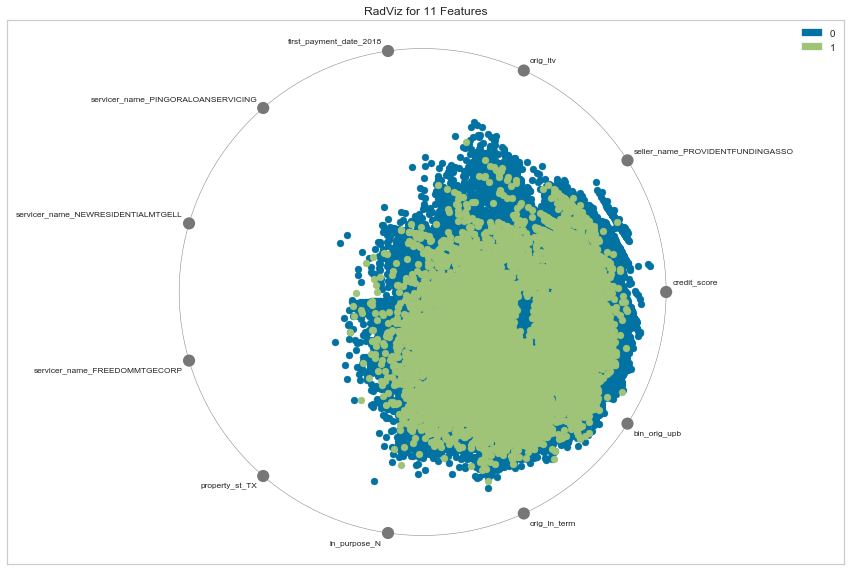

In [49]:
visualizer = RadViz(
    size=(1080, 720),
    classes=classes,
    features=features
)

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Draw the data

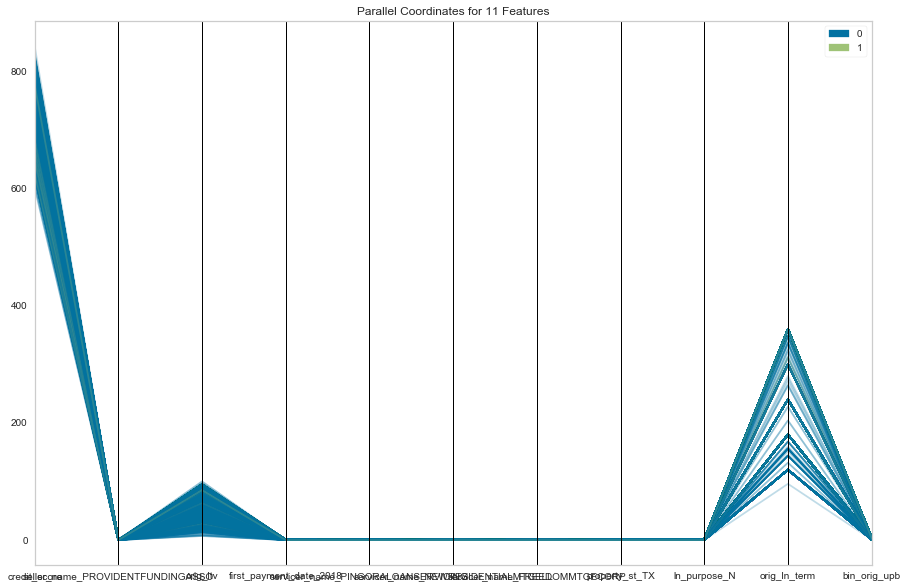

In [51]:
# Specify the features of interest and the classes of the target
classes = [0,1]

features = ['credit_score', 'seller_name_PROVIDENTFUNDINGASSO',
       'orig_ltv', 'first_payment_date_2018', 'property_st_TX', 
       'ln_purpose_N', 'orig_ln_term', 'bin_orig_upb']

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features, sample=0.01 ,
     shuffle=True, size=(1080, 720)
)

# Fit and transform the data to the visualizer
visualizer.fit(X, y)
visualizer.transform(X)

# Finalize the title and axes then display the visualization
visualizer.show()

In [ ]:
features = df[['mi_percent', 'unit_cnt',
            'orig_cltv', 'orig_debt_to_inc', 'bin_orig_upb', 'orig_ltv',
            'orig_int_rate', 'orig_ln_term']]
lda = LDA(n_components=2)
new_features = lda.fit(features, labels).transform(features)
print(new_features)


In [ ]:
# found on scikit learn website
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC())),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot("orig_ltv", "orig_upb", kind= "scatter")

In [ ]:
df.hist(column = ["credit_score","msa_code","mi_percent"])

In [ ]:
df.dtypes

In [ ]:
sns.lmplot(x = "credit_score", y = "orig_int_rate", data=df )    

In [ ]:
sns.lmplot(x="orig_upb", y="orig_ltv", data=df, fit_reg=False, hue="occupancy_status")

In [ ]:
sns.set_style("whitegrid")
sns.violinplot(x="occupancy_status", y="orig_upb", data=df)

In [ ]:
sns.distplot(df["orig_ltv"])

In [ ]:
sns.jointplot(df["orig_upb"], df["orig_ltv"])

In [ ]:
sns.lmplot(x="orig_upb", y="orig_ltv", data=df, fit_reg=False, hue="curr_ln_delq_stas_1yr")

In [ ]:
sns.lmplot(x="orig_upb", y="orig_ltv", data=df, fit_reg=False, hue="curr_ln_delq_stas_1yr")